# HW3.

1. [4th-order Runge Kutta method, 40pts] RC 회로에서 축전기에 있는 전하 $q$는 다음과 같은
미분방정식을 만족한다.
$$\varepsilon=R \frac{d q}{d t}+\frac{q}{C} (0<t<t_0)$$
초기조건 $q(t=0)= 0$일 때, 미분방정식을 4th-order Runge Kutta method로 풀어서
$q$를 $t$의 함수로 그리시오.

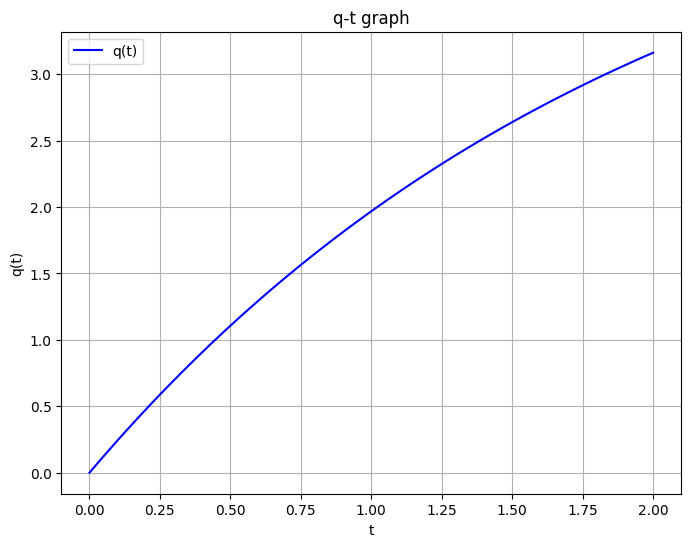

In [125]:
import numpy as np
import matplotlib.pyplot as plt

E = 5; R = 2; C = 1; t0 = 2
q = 0.0
dt = 0.01 * t0

q_arr = []

t_values = np.linspace(0, t0, 101)

def dq_dt(t, q, E, R, C):
        return E/R - q/(C*R)

for t in t_values:
    q_arr.append(q)

    k1 = dq_dt(t, q, E, R, C) * dt
    k2 = dq_dt(t + 0.5 * dt, q + 0.5 * k1, E, R, C) * dt
    k3 = dq_dt(t + 0.5 * dt, q + 0.5 * k2, E, R, C) * dt
    k4 = dq_dt(t + dt, q + k3, E, R, C) * dt

    q += (k1 + 2*k2 + 2*k3 + k4) / 6

plt.figure(figsize=(8, 6))
plt.plot(t_values, q_arr, label="q(t)", color="b")
plt.title("q-t graph")
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend()
plt.grid(True)
plt.show()


위의 코드는 4th Runge-Kutta 방법을 통해 축전기에 저장된 전하량 $q$을 $t$에 관한 그래프로 표현한 코드이다.
변수 E는 전압을 나타내며 5로 임의로 설정하였으며, 변수 R은 저항을 나타내며 2로 임의로 지정하였다. 변수 C는 축전기의 전기용량을 나타내며, 1로 임의로 지정하였다. $t_0$는 2로 임의로 설정하였다. 전하량 $q$의 초깃값은 문제에서 주어진 조건과 같이 0으로 지정하였으며, 시간의 간격값인 dt는 $0.01t_0$로 설정하였다. t_values는 $0$~$t_0$의 $t$값을 100등분하여 저장해놓은 리스트이고, q_arr는 t값에 따라 4th Runge-Kutta 방법을 구해 도출된 q값을 저장하는 리스트이다. 사용자 정의함수 dq_dt는 t, q, E, R, C값을 입력받아 $\dfrac{dq}{dt}=\dfrac{\varepsilon}{R} - \dfrac{q}{RC}$값을 반환한다. \\
이후 for문을 통해 t_values값에 따른  전하량을 q_arr에 저장하고, 4th Runge-Kutta 방법을 통해 q값을 업데이트 한다.
for문 내의

```
k1 = dq_dt(t, q, E, R, C) * dt
k2 = dq_dt(t + 0.5 * dt, q + 0.5 * k1, E, R, C) * dt
k3 = dq_dt(t + 0.5 * dt, q + 0.5 * k2, E, R, C) * dt
k4 = dq_dt(t + dt, q + k3, E, R, C) * dt
    
q += (k1 + 2*k2 + 2*k3 + k4) / 6
```
는 4th Runge-Kutta 방법의
$$k_1 = f(t, y_n) \\
k_2 = f(t+\dfrac{1}{2}\Delta t, y_n+\dfrac{1}{2}\Delta tk_1) \\
k_3 = f(t+\dfrac{1}{2}\Delta t, y_n+\dfrac{1}{2}\Delta tk_2) \\
k_4 = f(t+\Delta t, y_n+\Delta tk_3) \\
y_{n+1} = y_n + \Delta t \dfrac{k_1+2k_2+2k_3+k_4}{6}$$
을 나타낸 코드이다.

이후 matplotlib를 통해 x축이 t_values이고, y축이 q_arr인 그래프를 작성하였다. 이떄 x축의 범위는 $0<t \leq t_0$이다.

2. [Schrodinger Equation of infinite well (particle in a box), 80pts] 전자의 파동함수를 기술하는 슈뢰딩거 방정식은 다음과 같다.
$$E\psi = -\dfrac{\hbar^2}{2m}\dfrac{\partial^2\psi}{\partial x^2}+V\psi$$
무한 우물에서 포텐셜 에너지는 다음과 같다. (편의상 $L= 1$로 두세요.)
$$V =
\begin{cases}
0 & (0 < x < L) \\
\infty & (x > L, x < 0)
\end{cases} $$

이 경우 경계조건은 다음과 같이 주어진다.

2.A. $E = \dfrac{\hbar^2}{2m}\left(\dfrac{\pi}{L}\right)^2$이고 $x=0$에서 초기값이 $\psi (0) = 0$, $\psi^{'}(0) = 1$일 때, $0<x<L$구간에서 $\psi(x)$를 구해서 그리고, $\psi(L) = 0$ 이 됨을 확인하세요. [20pts]

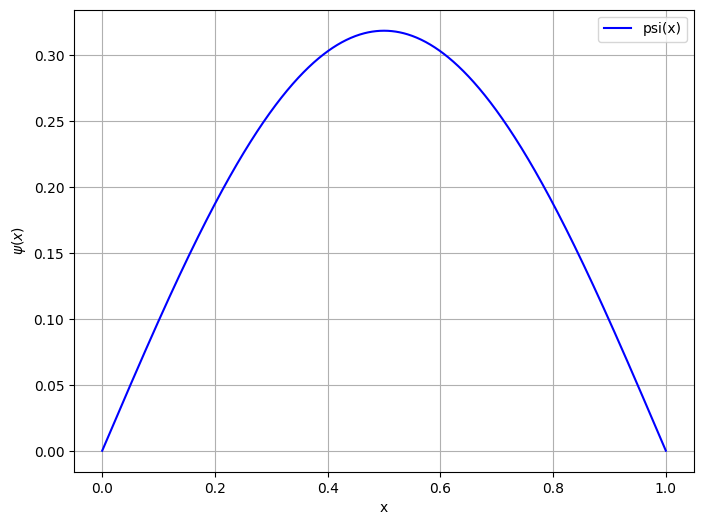

In [126]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0
m = 1.0
hbar = 1.0
E = (hbar**2/2*m) * (np.pi/L)**2

psi = 0.0
phi = 1.0
dx = 0.001

k = np.sqrt(2 * m * E) / hbar

def dpsi_dx(x, psi, phi):
    return phi

def dphi_dx(x, psi, phi):
    return -k**2 * psi

psi_arr = []

x_values = np.linspace(0, 1, 1001)

for x in x_values:
  psi_arr.append(psi)

  k1_psi = dpsi_dx(x, psi, phi) * dx
  k1_phi = dphi_dx(x, psi, phi) * dx

  k2_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
  k2_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx

  k3_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
  k3_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx

  k4_psi = dpsi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
  k4_phi = dphi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx

  psi +=  (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
  phi +=  (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6

plt.figure(figsize=(8, 6))
plt.plot(x_values, psi_arr, label="psi(x)", color="b")
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.legend()
plt.grid(True)
plt.show()


주어진 슈뢰딩거 방정식을 $0<x<L$ 구간에서 정리해보면
$$\dfrac{\partial^2\psi}{\partial x^2} = -\dfrac{2mE}{\hbar^2}\psi$$이고, 이때 $\psi^{'}(x) = \phi(x)$로 정의하면
$$\dfrac{d\psi}{dx}=\phi(x), \\
\dfrac{d\phi}{dx} = -k^2\psi  \quad (k^2 = \dfrac{2mE}{\hbar^2})$$로 나타낼 수 있다. \\

위의 코드는 4th Runge-Kutta 방법을 통해 위의 2차 미분방정식을 푼 뒤 이를 $x$와 $\psi$에 대해 나타낸 그래프이다. 변수 L은 무한우물의 길이를 나타내는 변수로, 문제에서 주어진대로  1.0으로 설정하였다. 변수 m은 전자의 질량을 나타내는 변수이며 임의로 1.0으로 설정하였다. 변수 hbar는 임의로 1.0으로 설정하였다. 변수 E는 문제에서 주어진대로 $\dfrac{\hbar^2}{2m}\left(\dfrac{\pi}{L}\right)^2$로 설정하였다. 변수 psi는 $\psi$의 초깃값으로, 0으로 설정하였고, 변수 phi는 $\phi = \psi^{'}$의 초깃값으로, 문제에서 주어진대로 1로 설정하였다. dx는 x값의 간격으로 0.001로 설정하였다. 변수 k는 위의 식에서 정의한대로 설정하였다. 사용자 정의 함수 dpsi_dx는 x, psi, phi를 입력받아 phi를 반환하는 함수이고, 사용자 정의 함수 dphi_dx는 x, psi, phi를 입력받아 $-k^2$*psi를 반환하는 함수이다. 리스트 psi_arr는 4th Runge-Kutta 방법에 의해 구해진 psi값들이 저장되는 리스트이며, 리스트 x_values는 $0 \sim L$의 $x$값을 1000등분하여 저장하였다. 이후 for문을 통해 x_values 리스트 내의 x값에 따라 4th Runge-Kutta 방법을 통해 psi값과 phi값을 업데이트 하며 2차 미분방정식을 푼 뒤, 이를 통해 도출 된 psi값을 psi_arr에 저장한다. \\
for문 내의

```
k1_psi = dpsi_dx(x, psi, phi) * dx
k1_phi = dphi_dx(x, psi, phi) * dx
    
k2_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
k2_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
    
k3_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
k3_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
    
k4_psi = dpsi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
k4_phi = dphi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
    
psi +=  (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
phi +=  (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6
```
부분은 psi와 phi에 대해 각각 4th Runge-Kutta 방법을 적용한 것으로, $$k_1 = f(t, y_n) \\
k_2 = f(t+\dfrac{1}{2}\Delta t, y_n+\dfrac{1}{2}\Delta tk_1) \\
k_3 = f(t+\dfrac{1}{2}\Delta t, y_n+\dfrac{1}{2}\Delta tk_2) \\
k_4 = f(t+\Delta t, y_n+\Delta tk_3) \\
y_{n+1} = y_n + \Delta t \dfrac{k_1+2k_2+2k_3+k_4}{6}$$ 공식을 의미한다.

이후 matplotlib를 통해 x축이 x_values이고, y축이 psi_arr인 그래프를 작성하였다. 위의 그래프를 통해 $x=L$에서 $\psi(x)$의 값이 0으로 수렴함을 알 수 있다.

2.B. $E = n\dfrac{\hbar^2}{2m}\left(\dfrac{\pi}{L}\right)^2$이고 $x=0$에서 초기값이 $\psi (0) = 0$, $\psi^{'}(0) = 1$일 때, $n = 1, 2, ..., 10$의 10가지 경우에 대해서 $0<x<L$구간에서 $\psi(x)$를 구해서 그리시오. $\psi(L) = 0$ 이 되는 $n$값을 구하시오. [20pts]

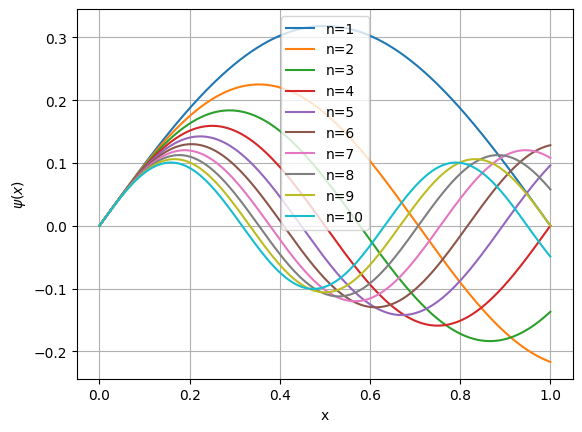

In [127]:
import numpy as np
import matplotlib.pyplot as plt


L = 1.0
m = 1.0
hbar = 1.0

dx = 0.001
x_values = np.linspace(0, L, 1001)

def dpsi_dx(x, psi, phi):
    return phi

def dphi_dx(x, psi, phi, k):
    return -k**2 * psi

def solve_psi(n):
    E_n = n * (hbar**2 / (2 * m)) * (np.pi / L)**2
    k = np.sqrt(2 * m * E_n) / hbar

    psi = 0.0
    phi = 1.0

    psi_arr = []

    for x in x_values:
      psi_arr.append(psi)

      k1_psi = dpsi_dx(x, psi, phi) * dx
      k1_phi = dphi_dx(x, psi, phi, k) * dx

      k2_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
      k2_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi, k) * dx

      k3_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
      k3_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi, k) * dx

      k4_psi = dpsi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
      k4_phi = dphi_dx(x + dx, psi + k3_psi, phi + k3_phi, k) * dx

      psi += (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
      phi += (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6

    return psi_arr


for n in range(1, 11):
    psi_values = solve_psi(n)
    plt.plot(x_values, psi_values, label=f"n={n}")

plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.legend()
plt.grid(True)
plt.show()


위의 코드는 n = 1~10의 경우에 대해서 각각 $\psi(x)$를 그래프로 나타낸 코드이다. 기본적인 변수와 사용자 정의 함수는 2.A번 문제와 동일하게 가정하였다. 새롭게 정의한 사용자 정의 함수 solve_psi는 n값을 입력받아 n값에 따른 $E$값을 구한 뒤 이를 바탕으로 4th Runge-Kutta 방법을 적용하여 psi값을 구하여 최종적으로 psi_arr 리스트를 반환하는 함수이다. solve_psi내의 변수 $E_n$은 문제에서 주어진대로 $n\dfrac{\hbar^2}{2m}\left(\dfrac{\pi}{L}\right)^2$로 가정하였으며, 변수 k는 E_n을 바탕으로 정의하였다. 이후 for문을 통해 2.A번 문제와 같은 과정을 통해 psi값을 업데이트하며, 최종적으로 x값에 따른 psi값을 담은 리스트인 psi_arr를 반환한다. 이후 for문을 통해 n값을 1에서 10까지 변화시켜가며 x값에 따른 $\psi(x)$의 그래프를 작성한다. 리스트 psi_values는 n값에 따른 solve_psi의 반환값을 저장하며, 이후 x축이 x_values이고 y축이 psi_values인 그래프를 작성하였다. \\
위 그래프를 통해 $n= 1, 4, 9$ 일 때 $\psi(L)$의 값이 0으로 수렴함을 알 수 있다.

2.C. $x=0$에서 초기값이 $\psi(0) = 0$, $\psi^{'}(0) = 1$일 떄, 임의의 $E$에 대하여 $\psi(L)$을 구하여 $\psi(L)$을 $0<E<50\dfrac{\hbar^2}{2m}\left(\dfrac{\pi}{L}\right)^2$의 구간에서 $E$의 함수로 그리시오. $\psi(L) = 0$이 되는 $n$값의 규칙을 찾아보세요. [30pts]

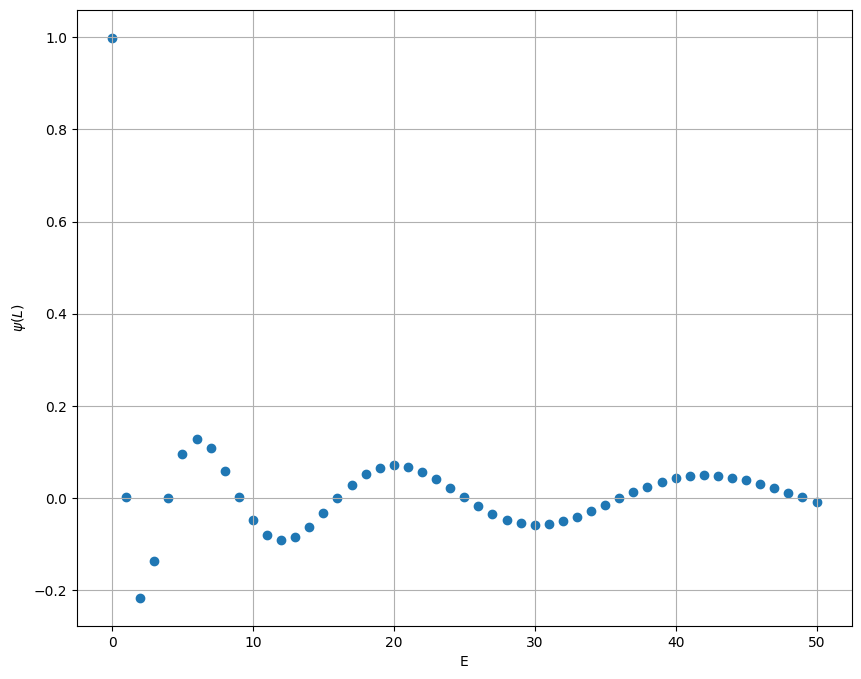

In [128]:
import numpy as np
import matplotlib.pyplot as plt


L = 1.0
m = 1.0
hbar = 1.0

dx = 0.001
x_values = np.linspace(0, L, 1000)

def dpsi_dx(x, psi, phi):
    return phi

def dphi_dx(x, psi, phi, k):
    return -k**2 * psi

def solve_psi(n):
    E_n = n * (hbar**2 / (2 * m)) * (np.pi / L)**2
    k = np.sqrt(2 * m * E_n) / hbar

    psi = 0.0
    phi = 1.0

    psi_arr = []

    for x in x_values:
      psi_arr.append(psi)

      k1_psi = dpsi_dx(x, psi, phi) * dx
      k1_phi = dphi_dx(x, psi, phi, k) * dx

      k2_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
      k2_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi, k) * dx

      k3_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
      k3_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi, k) * dx

      k4_psi = dpsi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
      k4_phi = dphi_dx(x + dx, psi + k3_psi, phi + k3_phi, k) * dx

      psi += (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
      phi += (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6

    return psi_arr[-1]

n_values = np.linspace(0, 50, 51)

psi_L_values = []

for n in n_values:
    psi_L_value = solve_psi(n)
    psi_L_values.append(psi_L_value)


plt.figure(figsize=(10, 8))
plt.scatter(n_values, psi_L_values)
plt.xlabel("E")
plt.ylabel("$\psi(L)$")
plt.grid(True)
plt.show()

위의 코드는 E값에 따른 $\psi(L)$의 값을 나타낸 그래프이다. 변수 설정과 초깃값은 2.A와 2.B 문제와 동일하게 설정하으며, 2.B번과 달리 위의 코드에서는 사용자 정의 함수 solve_psi가 psi_arr의 -1번 원소, 즉, $\psi(L)$의 값을 반환하도록 설정하였다. 이후 0~50의 n값을 담은 n_values 리스트를 선언한 뒤, for문을 이용해 n_values 내의 n값에 따른 $\psi(L)$값을 psi_L_values 리스트에 저장하였다. 이후 matplotlib를 통해 x축이 E이고, y축이 $\psi(L)$인 그래프를 작성하였다. 이때 x축의 값은 $E = n\dfrac{\hbar^2}{2m}\left(\dfrac{\pi}{L}\right)^2$에서 $n$의 값을 의미한다. \\
위 그래프를 통해 $n = 1, 4, 9, 16, 25, 36, 49$일때 $\psi(L)$값이 $0$임을 알 수 있다. 따라서 $n$이 제곱수일때 $\psi(L) = 0$임을 확인할 수 있다.

3. [Schrodinger Equation of harmonic oscillator, 80pts] 전자의 파동함수를 기술하는 슈뢰딩거 방정식은 다음과 같다.
$$E\psi = -\dfrac{\hbar^2}{2m}\dfrac{\partial^2\psi}{\partial x^2}+V\psi$$
단조화 진동자의 포텐셜 에너지 $V$는 다음과 같다.
$$V=\dfrac{1}{2}m\omega^2x^2$$

3.A. $E= \dfrac{3}{2}\hbar\omega$ 이고, $x=0$에서 초기값이 $\psi(0)= 0$, $\psi^{'}(0) = 1$ 일 때, $-L < x < L$ 구간에서 $\psi(x)$를 구해서 $\psi(L)$이 0으로 수렴함을 확인하세요. 여기서 $L = 5\sqrt{\dfrac{\hbar}{m\omega}}$ [40pts]

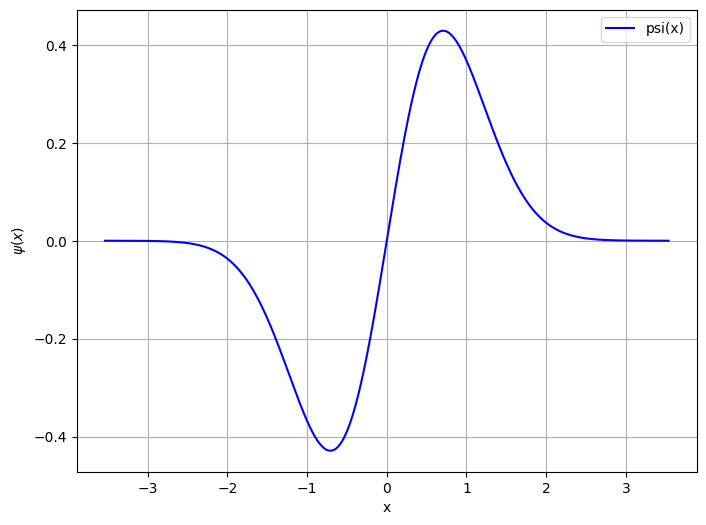

In [129]:
import numpy as np
import matplotlib.pyplot as plt

m = 1.0
hbar = 1.0
omega = 2.0
L = 5 * np.sqrt(hbar/(m*omega))
E = 1.5 * hbar * omega

psi = 0.0
phi = 1.0
dx = L / 1000

def dpsi_dx(x, psi, phi):
    return phi

def dphi_dx(x, psi, phi):
    V = 0.5 * m * (omega**2) * (x**2)
    return -(2 * m / hbar**2) * (E - V) * psi

psi_arr1 = []
psi_arr2 = []

x_values = np.linspace(-L, L, 2001)
x_values1 = np.linspace(0, L, 1001)
x_values2 = np.linspace(0, -L, 1001)

for x in x_values1:
    psi_arr1.append(psi)

    k1_psi = dpsi_dx(x, psi, phi) * dx
    k1_phi = dphi_dx(x, psi, phi) * dx

    k2_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
    k2_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx

    k3_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
    k3_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx

    k4_psi = dpsi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
    k4_phi = dphi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx

    psi += (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
    phi += (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6

psi = 0.0
phi = 1.0

for x in x_values2:
    psi_arr2.append(psi)

    k1_psi = dpsi_dx(x, psi, phi) * -dx
    k1_phi = dphi_dx(x, psi, phi) * -dx

    k2_psi = dpsi_dx(x + 0.5 * -dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * -dx
    k2_phi = dphi_dx(x + 0.5 * -dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * -dx

    k3_psi = dpsi_dx(x + 0.5 * -dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * -dx
    k3_phi = dphi_dx(x + 0.5 * -dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * -dx

    k4_psi = dpsi_dx(x + -dx, psi + k3_psi, phi + k3_phi) * -dx
    k4_phi = dphi_dx(x + -dx, psi + k3_psi, phi + k3_phi) * -dx

    psi += (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
    phi += (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6


psi_arr3 = psi_arr2[::-1]
del psi_arr3[-1]
psi_arr = psi_arr3 + psi_arr1


plt.figure(figsize=(8, 6))
plt.plot(x_values, psi_arr, label="psi(x)", color="b")
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.legend()
plt.grid(True)
plt.show()


위의 코드는 주어진 $E$ 값에 따른 $-L < x <L$ 구간에서의 $\psi(x)$ 그래프를 작성하는 코드이다. 슈뢰딩거 방정식에 문제에서 주어진 V를 대입하면
$$ (E-V)\psi = -\dfrac{\hbar^2}{2m}\dfrac{\partial^2\psi}{\partial x^2}$$이고, 이때 $\psi^{'}(x) = \phi(x)$로 정의하면
$$\dfrac{d\psi}{dx}=\phi(x), \\
\dfrac{d\phi}{dx} = -k^2\psi  \quad (k^2 = \dfrac{2m(E-V)}{\hbar^2})$$ 로 나타낼 수 있다. \\
위의 코드에서 변수 omega는 2.0으로 임의로 설정하였으며, 변수 L은 문제에서 주어진 대로  $5\sqrt{\dfrac{\hbar}{m\omega}}$로 정의하였고,  변수 E는 문제에서 주어진 대로 $E= \dfrac{3}{2}\hbar\omega$ 로 정의하였다. 이외의 나머지 변수 및 초기값은 이전의 2번 문제와 동일하게 설정하였다. 사용자 정의 함수 dphi_dx는 x, psi, phi를 입력받아 x값에 따른 V값을 계산한 뒤 위에서 구한 2차 미분방정식의 $\dfrac{d\phi}{dx}$값인 $-\dfrac{2m(E-V)}{\hbar^2}\psi$ 값을 반환한다. \\
문제에서 구해야하는 그래프의 범위는 $-L \sim L$이지만, 주어진 초깃값이 $x=0$일때 이므로 $x=0$을 기준으로 $x$값이 양수일때와 음수일때로 나누어 4th Runge-Kutta 방법을 통해 $\psi(x)$의 값을 구하였다. 리스트 psi_arr1은 x의 값이 양수일때의 psi값을 저장하며, 리스트 psi_arr2는 x의 값이 음수일때의 psi값을 저장한다. 리스트 x_values1은 $0 \sim L$의 값을 1000등분하여 저장하였으며, 리스트 x_values2는 $0 \sim -L$의 값을 1000등분 하여 저장하하였다. 이후 for문을 통해 x_values1 리스트 내의 x값들에 대해 4th Runge-Kutta 방법을 사용해서 psi값을 업데이트 한 뒤 이를 psi_arr1에 저장하였으며, x_values2 리스트 내의 x값들에 대해 4th Runge-Kutta 방법을 사용해서 psi값을 업데이트 한 뒤 이를 psi_arr2에 저장하였다. 이후 psi_arr2 내의 값들의 순서를 거꾸로 바꾼 psi_arr3 리스트를 선언하였으며, psi_arr1리스트와 psi_arr3 리스트는 $x=0$에서의 함숫값이 겹치므로 psi_arr3 리스트에서 이를 삭제해준 뒤, psi_arr3리스트와 psi_arr1 리스트를 합친 psi_arr리스트를 생성하였다. 이후 matplotlib를 통해 x축이 x_values이고, y축이 psi_arr인 그래프를 생성하였다. \\
위 그래프를 통해 $\psi(L)$이 0으로 수렴함을 알 수 있다.

3.B. $E= (n+\dfrac{1}{2})\hbar\omega$ 이고, $x=0$에서 초기값이 $\psi(0)= 0$, $\psi^{'}(0) = 1$ 일 때, $n = 0, 1, 2, 3$의 4가지 경우에 대해서 $-L < x < L$ 구간에서 $\psi(x)$를 구하시오.(4가지 경우 다 따로 그릴것!) $\psi(L)$이 0으로 수렴하는 경우와 그렇지 않은 경우의 $n$의 규칙을 찾아보세요. 여기서 $L = 5\sqrt{\dfrac{\hbar}{m\omega}}$ [40pts]

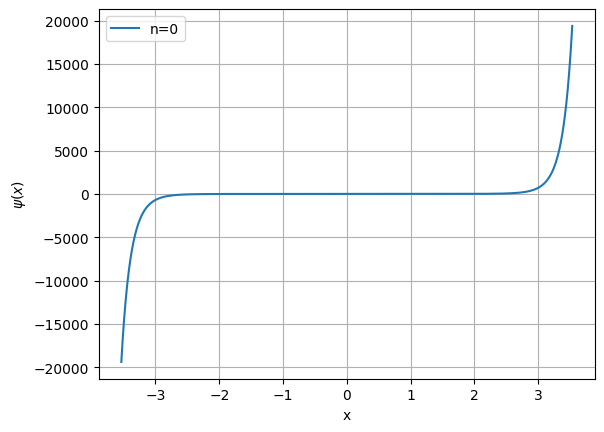

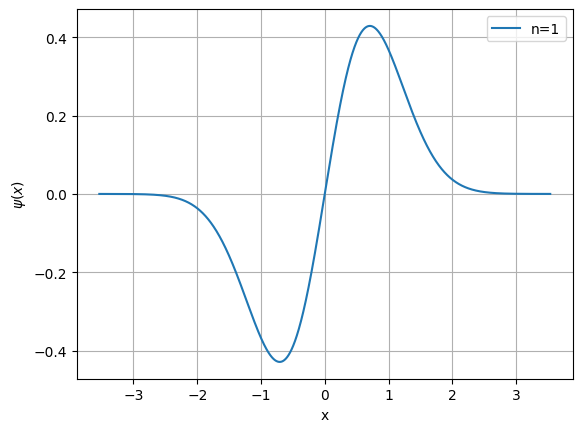

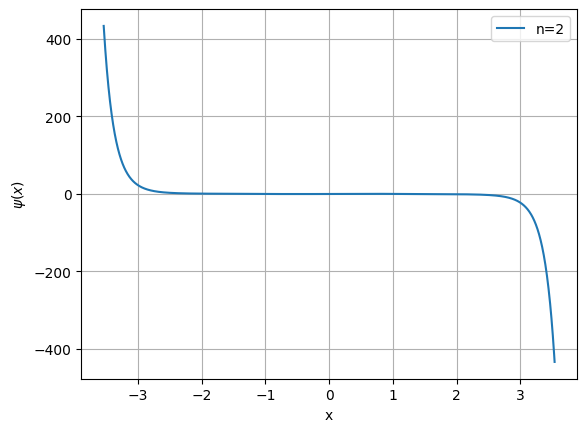

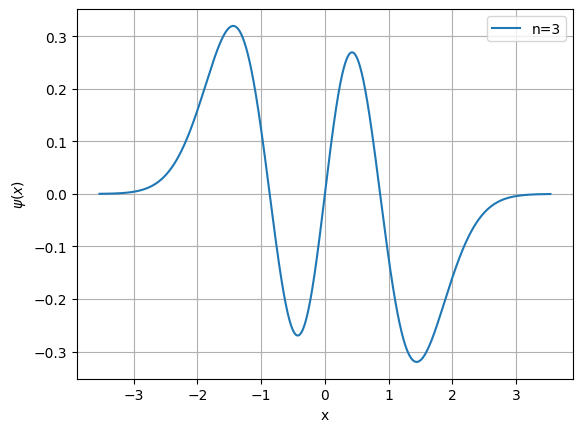

In [130]:
import numpy as np
import matplotlib.pyplot as plt

m = 1.0
hbar = 1.0
omega = 2.0
L = 5 * np.sqrt(hbar/(m*omega))


dx = L / 1000
x_values = np.linspace(-L, L, 2001)

def dpsi_dx(x, psi, phi):
    return phi

def dphi_dx(x, psi, phi):
    V = 0.5 * m * (omega**2) * (x**2)
    return -(2 * m / hbar**2) * (E_n - V) * psi

def solve_psi(n):
  global E_n
  E_n= (n+0.5) * hbar * omega
  psi = 0.0
  phi = 1.0

  psi_arr1 = []
  psi_arr2 = []


  x_values1 = np.linspace(0, L, 1001)
  x_values2 = np.linspace(0, -L, 1001)

  for x in x_values1:
    psi_arr1.append(psi)

    k1_psi = dpsi_dx(x, psi, phi) * dx
    k1_phi = dphi_dx(x, psi, phi) * dx

    k2_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx
    k2_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * dx

    k3_psi = dpsi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx
    k3_phi = dphi_dx(x + 0.5 * dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * dx

    k4_psi = dpsi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx
    k4_phi = dphi_dx(x + dx, psi + k3_psi, phi + k3_phi) * dx

    psi += (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
    phi += (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6

  psi = 0.0
  phi = 1.0

  for x in x_values2:
    psi_arr2.append(psi)

    k1_psi = dpsi_dx(x, psi, phi) * -dx
    k1_phi = dphi_dx(x, psi, phi) * -dx

    k2_psi = dpsi_dx(x + 0.5 * -dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * -dx
    k2_phi = dphi_dx(x + 0.5 * -dx, psi + 0.5 * k1_psi, phi + 0.5 * k1_phi) * -dx

    k3_psi = dpsi_dx(x + 0.5 * -dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * -dx
    k3_phi = dphi_dx(x + 0.5 * -dx, psi + 0.5 * k2_psi, phi + 0.5 * k2_phi) * -dx

    k4_psi = dpsi_dx(x + -dx, psi + k3_psi, phi + k3_phi) * -dx
    k4_phi = dphi_dx(x + -dx, psi + k3_psi, phi + k3_phi) * -dx

    psi += (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi) / 6
    phi += (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi) / 6


  psi_arr3 = psi_arr2[::-1]
  del psi_arr3[-1]
  psi_arr = psi_arr3 + psi_arr1

  return psi_arr

for n in range(0, 4):
    psi_values = solve_psi(n)
    plt.plot(x_values, psi_values, label=f"n={n}")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
    plt.legend()
    plt.grid(True)
    plt.show()


위의 코드는 $E = (n+\dfrac{1}{2})\hbar\omega$ 일 때, $n$값에 따른 $-L < x < L$ 구간의 $\psi(x)$의 그래프를 작성하는 코드이다. 기본적인 변수와 초깃값은 이전의 3.A번 문제와 동일하다. 사용자 정의 함수 solve_psi는 n값을 입력받아 문제에서 주어진 에너지 상황인 $E_n$을 계산한 뒤 3.A번과 동일한 과정을 통해 리스트 psi_arr를 반환한다. 이후 for문을 통해 $n=0, 1, 2, 3$의 경우에 대해서 x축이 x_values이고 y축이 psi_arr인 그래프를 작성한다. \\
위의 4개 그래프를 통해 $n=0, 2$인 경우에는 $\psi(L)$값이 $0$으로 수렴하지 않으며, $n=1, 3$인 경우에는 $\psi(L)$값이 $0$으로 수렴한다는 사실을 확인할 수 있다. 이를 통해 $n$이 홀수인 경우에는 $\psi(L)$이 $0$으로 수렴하며, $n$이 짝수인 경우에는 $\psi(L)$이 $0$으로 수렴하지 않는다는 사실을 확인할 수 있다.